In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# [Datos](https://datos.cdmx.gob.mx/dataset/lineas-y-estaciones-del-metro/resource/b9b61c06-8325-4df1-85c6-10c3aa7af1ac?inner_span=True)

In [2]:
import zipfile
import geopandas as gpd
from pathlib import Path

metro_data = '/content/drive/MyDrive/MatApl/26-1 Ayudantias/Redes Complejas/Clases/STC_Metro_estaciones.kmz'

# Extraer el archivo KML del KMZ
with zipfile.ZipFile(metro_data, 'r') as zip_ref:
    zip_ref.extractall("temp_kml")

#Busca el primer archivo KML extraído
metro_data = next(Path("temp_kml").glob("*.kml"))

# Leer el KML usando geopandas
metro_df = gpd.read_file(metro_data)
print(metro_df.shape)
metro_df.head()

(195, 3)


,Name,Description,geometry
0,STC Metro,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",POINT Z (-99.07474 19.41633 0)
1,STC Metro,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",POINT Z (-99.08229 19.41192 0)
2,STC Metro,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",POINT Z (-99.09021 19.41648 0)
3,STC Metro,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",POINT Z (-99.09626 19.41994 0)
4,STC Metro,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",POINT Z (-99.10277 19.42336 0)


<html xmlns:fo="http://www.w3.org/1999/XSL/Format" xmlns:msxsl="urn:schemas-microsoft-com:xslt"> <head> <META http-equiv="Content-Type" content="text/html"> <meta http-equiv="content-type" content="text/html; charset=UTF-8"> </head> <body style="margin:0px 0px 0px 0px;overflow:auto;background:#FFFFFF;">
<table style="font-family:Arial,Verdana,Times;font-size:12px;text-align:left;width:100%;border-collapse:collapse;padding:3px 3px 3px 3px"> <tr style="text-align:center;font-weight:bold;background:#9CBCE2">

<td>STC Metro</td> </tr> <tr> <td> <table style="font-family:Arial,Verdana,Times;font-size:12px;text-align:left;width:100%;border-spacing:0px; padding:3px 3px 3px 3px"> <tr> <td>FID</td> <td>0</td> </tr> <tr bgcolor="#D4E4F3">

<td>SISTEMA</td> <td>STC Metro</td>

</tr> <tr> <td>NOMBRE</td> <td>Pantitlán</td> </tr> <tr bgcolor="#D4E4F3">

<td>LINEA</td> <td>01</td>

</tr> <tr> <td>EST</td> <td>01</td> </tr> <tr bgcolor="#D4E4F3">

<td>CVE_EST</td> <td>STC0101</td> </tr> <tr> <td>CVE_EOD17</td> <td>05014</td> </tr> <tr bgcolor="#D4E4F3">

<td>TIPO</td> <td>Terminal / Transbordo</td> </tr> <tr>

<td>ALCALDIAS</td> <td>Venustiano Carranza</td> </tr> <tr bgcolor="#D4E4F3">

<td>AÑO</td> <td>1984</td> </tr> </table> </td> </tr> </table> </body> </html>

In [3]:
#Extraer las coordenadas de las estaciones con GeoPandas; Point -> x, y
metro_df["lat"] = metro_df.geometry.y
metro_df["lon"] = metro_df.geometry.x

In [4]:
metro_df

,Name,Description,geometry,lat,lon
0,STC Metro,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",POINT Z (-99.07474 19.41633 0),19.416334,-99.074736
1,STC Metro,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",POINT Z (-99.08229 19.41192 0),19.411920,-99.082289
2,STC Metro,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",POINT Z (-99.09021 19.41648 0),19.416478,-99.090210
3,STC Metro,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",POINT Z (-99.09626 19.41994 0),19.419942,-99.096259
4,STC Metro,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",POINT Z (-99.10277 19.42336 0),19.423355,-99.102774
...,...,...,...,...,...
190,STC Metro,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",POINT Z (-99.04207 19.50149 0),19.501490,-99.042067
191,STC Metro,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",POINT Z (-99.03607 19.51513 0),19.515125,-99.036069
192,STC Metro,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",POINT Z (-99.03334 19.52134 0),19.521345,-99.033342
193,STC Metro,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",POINT Z (-99.03018 19.52848 0),19.528476,-99.030185


# Limpieza de datos

In [5]:
from bs4 import BeautifulSoup

def extraer_datos(html):
    soup = BeautifulSoup(html, "html.parser")
    #Busca todas las filas de tabla <tr>
    filas = soup.find_all("tr")
    #Formato de datos relevantes: </tr> <tr> <td>NOMBRE</td> <td>Pantitlán</td> </tr>
    datos = {}
    for i in range(len(filas)):
      #Toma las filas que tienen dos celdas (NOMBRE | Pantitlán)
        celdas = filas[i].find_all("td")
        if len(celdas) == 2:
            #Toma la clave (NOMBRE) y el valor (Nombre de la estación)
            clave = celdas[0].text.strip().upper()
            valor = celdas[1].text.strip()
            datos[clave] = valor
    return datos

In [6]:
import pandas as pd

datos = metro_df["Description"].apply(extraer_datos)

df_info = pd.DataFrame(datos.tolist())
df = pd.concat([metro_df, df_info], axis=1)

print(df.shape)
df = df[['NOMBRE', 'LINEA', 'EST' ,'TIPO', 'ALCALDIAS', 'AÑO', 'lat', 'lon']]
df.head()

(195, 15)


,NOMBRE,LINEA,EST,TIPO,ALCALDIAS,AÑO,lat,lon
0,Pantitlán,01,01,Terminal / Transbordo,Venustiano Carranza,1984,19.416334,-99.074736
1,Zaragoza,01,02,Intermedia,Venustiano Carranza,1969,19.411920,-99.082289
2,Gomez Farías,01,03,Intermedia,Venustiano Carranza,1969,19.416478,-99.090210
3,Boulevard Puerto Aéreo,01,04,Intermedia,Venustiano Carranza,1969,19.419942,-99.096259
4,Balbuena,01,05,Intermedia,Venustiano Carranza,1969,19.423355,-99.102774


In [7]:
df['LINEA'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '12', 'A',
       'B'], dtype=object)

In [8]:
import networkx as nx

G = nx.Graph()

#Agregar nodos con su posición geográfica
for _, row in df.iterrows():
    G.add_node(row['NOMBRE'],
               linea=row['LINEA'],
               tipo=row['TIPO'],
               alcaldia=row['ALCALDIAS'],
               año=row['AÑO'],
               pos=(row['lon'], row['lat']))  #(x, y) = (lon, lat)

In [9]:
# Agrupar por línea y ordenar por número de estación
for linea, grupo in df.groupby("LINEA"):
    grupo_ordenado = grupo.sort_values("EST")

    # Conectar cada estación con la siguiente en la misma línea
    nombres = grupo_ordenado["NOMBRE"].tolist()
    for i in range(len(nombres) - 1):
        G.add_edge(nombres[i], nombres[i+1], linea=linea)


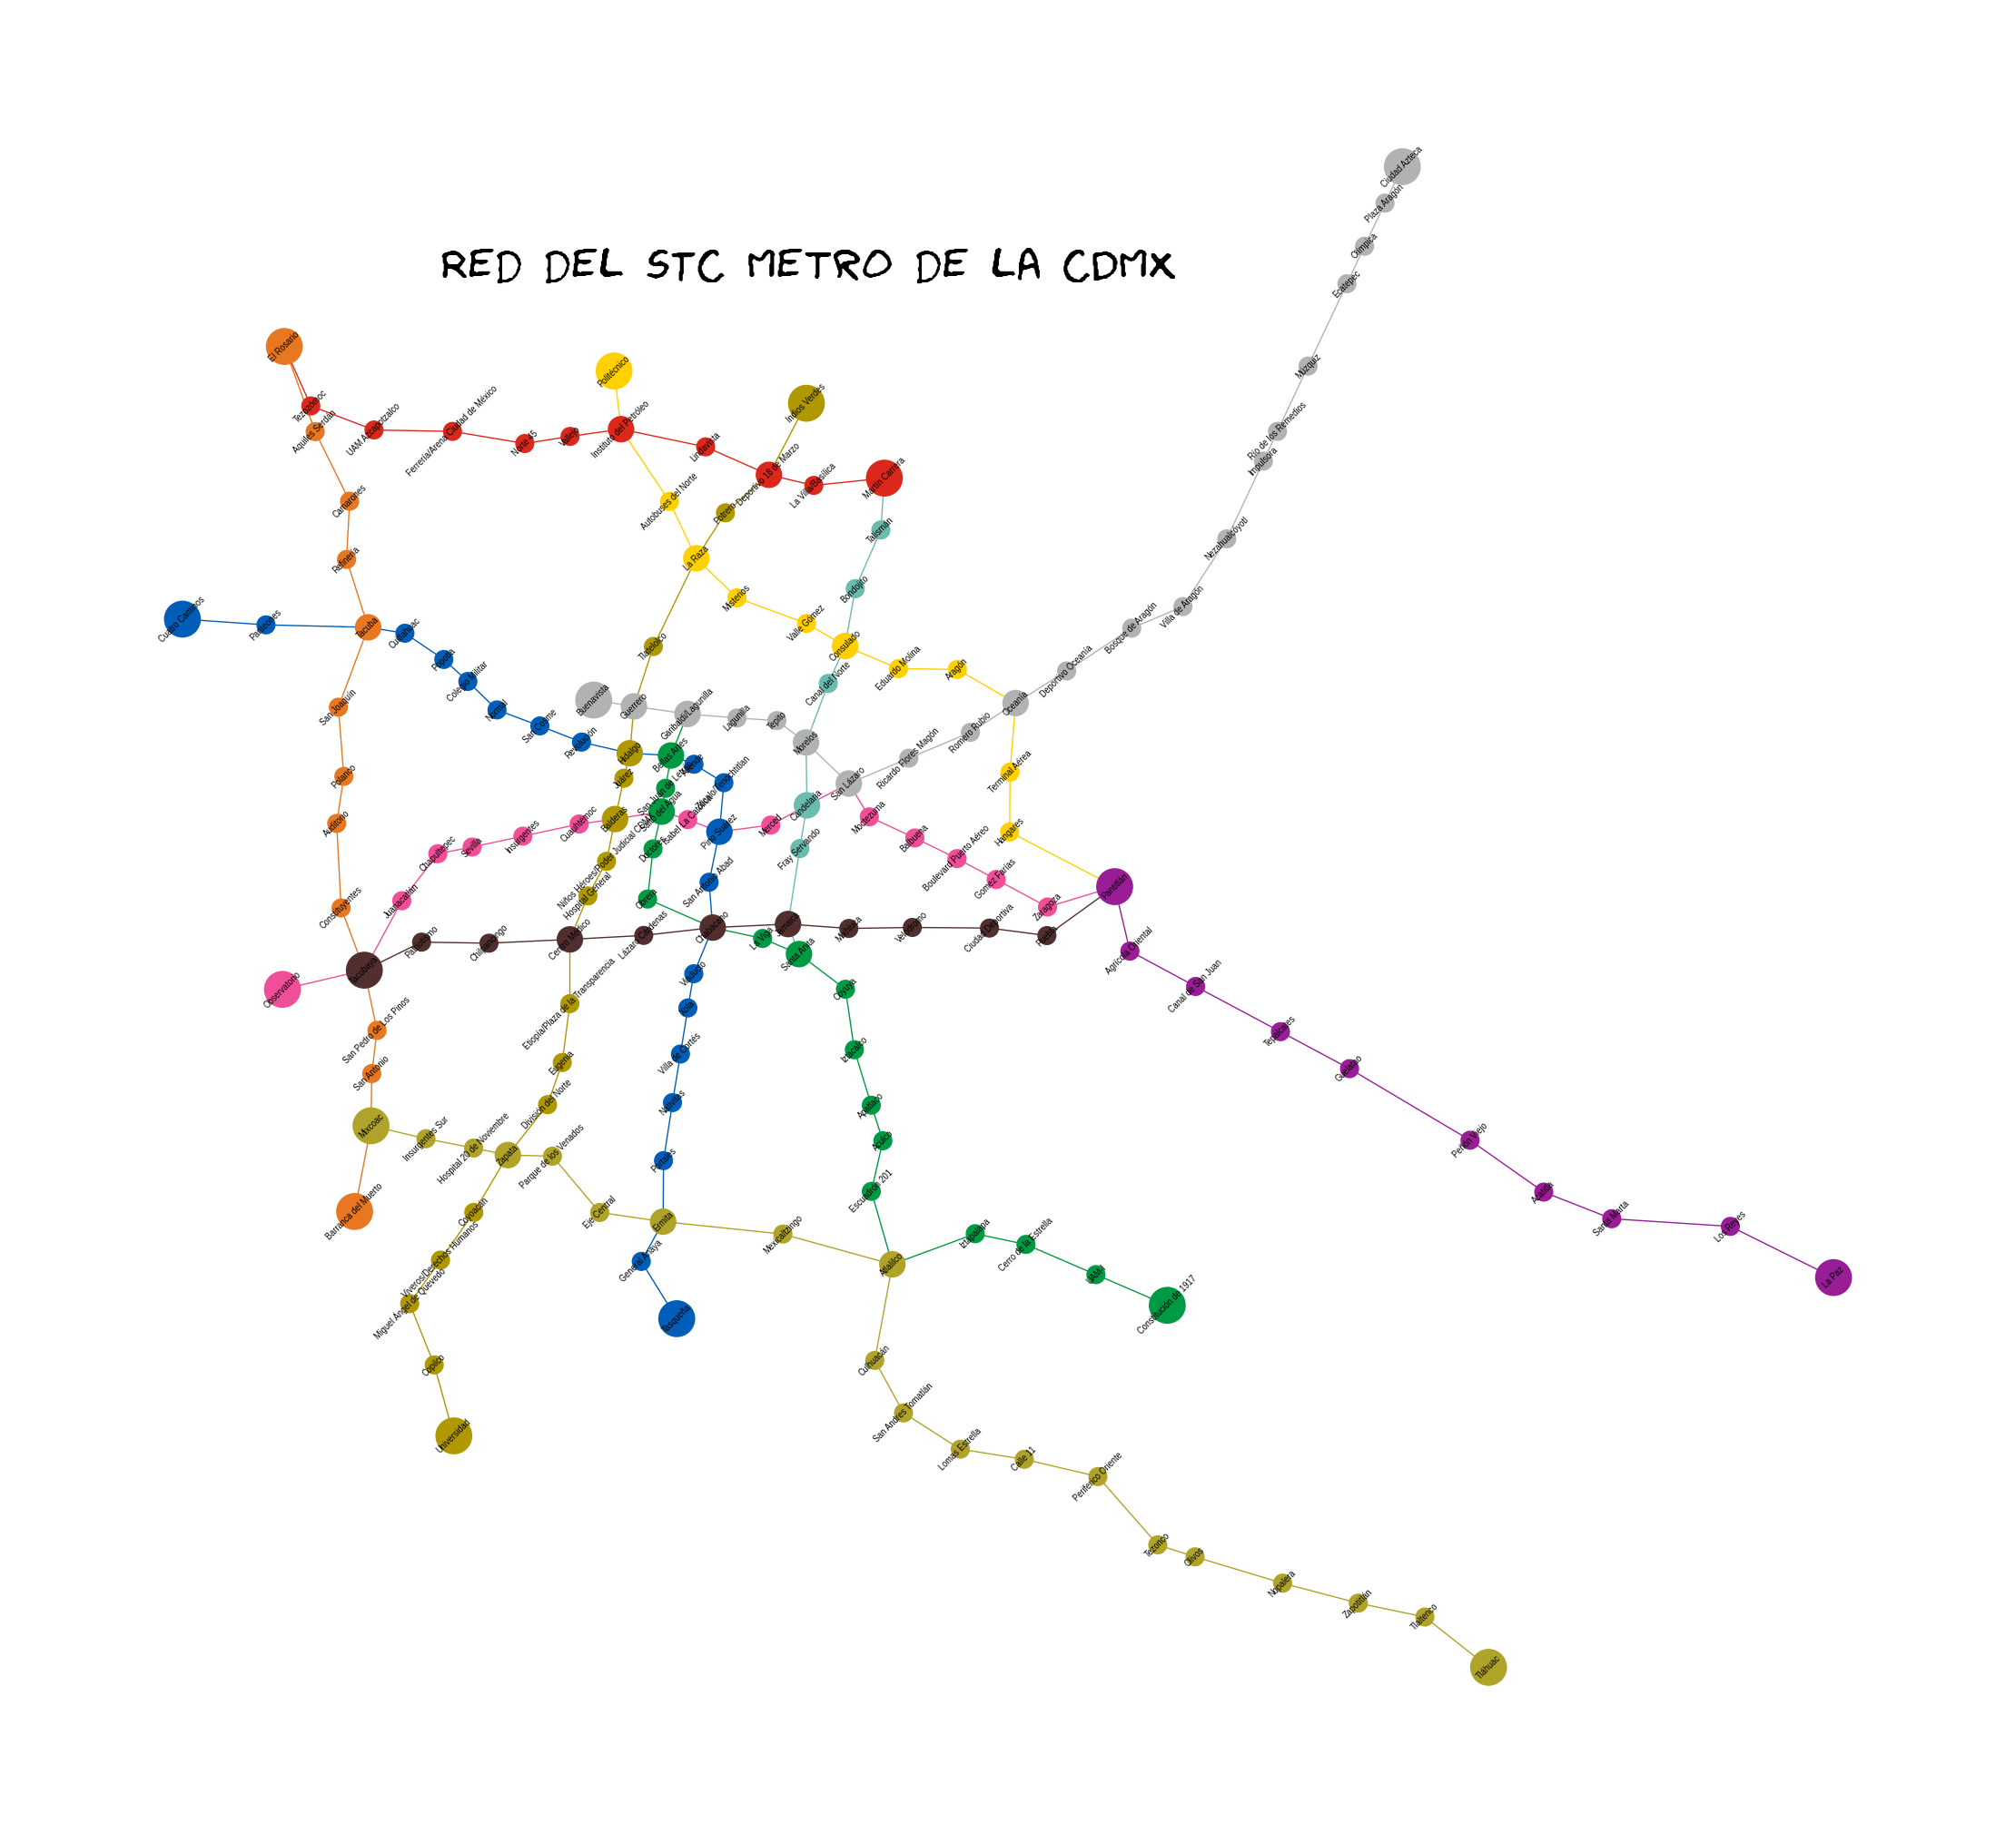

In [46]:
import matplotlib.pyplot as plt

# https://en.wikipedia.org/wiki/Module:Adjacent_stations/Mexico_City_Metro
colores_linea = {
    "01": "#F04E98",
    "02": "#005EB8",
    "03": "#AF9800",
    "04": "#6BBBAE",
    "05": "#FFD100",
    "06": "#DA291C",
    "07": "#E87722",
    "08": "#009A44",
    "09": "#512F2E",
    "12": "#B0A32A",
    "A":  "#981D97",
    "B":  "#B1B3B3"
}

# Colores de aristas
edge_colors = [colores_linea[G.edges[e]['linea']] for e in G.edges]

# Colores de nodos
node_colors = [colores_linea[G.nodes[n]['linea']] for n in G.nodes]

# Tamaños de nodos dependiendo del tipo de estación
node_sizes = []
for n in G.nodes:
    tipo = G.nodes[n]['tipo'].lower()
    if "transbordo" and "terminal" in tipo:
        node_sizes.append(800)
    elif "transbordo" in tipo:
        node_sizes.append(400)
    elif "terminal" in tipo:
        node_sizes.append(300)
    else:
        node_sizes.append(200)

pos = nx.get_node_attributes(G, 'pos')


plt.figure(figsize=(22, 20))
nx.draw(
    G, pos,
    with_labels=False,
    node_size=node_sizes,
    node_color=node_colors,
    edge_color=edge_colors,
    font_size=8,
    font_color="Black"
)

#Ponemos las etiquetas aparte para poder rotarlas
labels = {n: n for n in G.nodes}
textos = nx.draw_networkx_labels(
    G, pos, labels,
    font_size=8,
    font_color="black",
    font_family="Liberation Sans Narrow"
)

for t in textos.values():
    t.set_rotation(45)

plt.title(
    "Red del STC Metro de la CDMX",
    fontsize=35,
    fontweight="bold",
    fontname="Humor Sans",
    color="black",
    y=0.85,
    x=0.4
)

plt.axis("off")
plt.show()

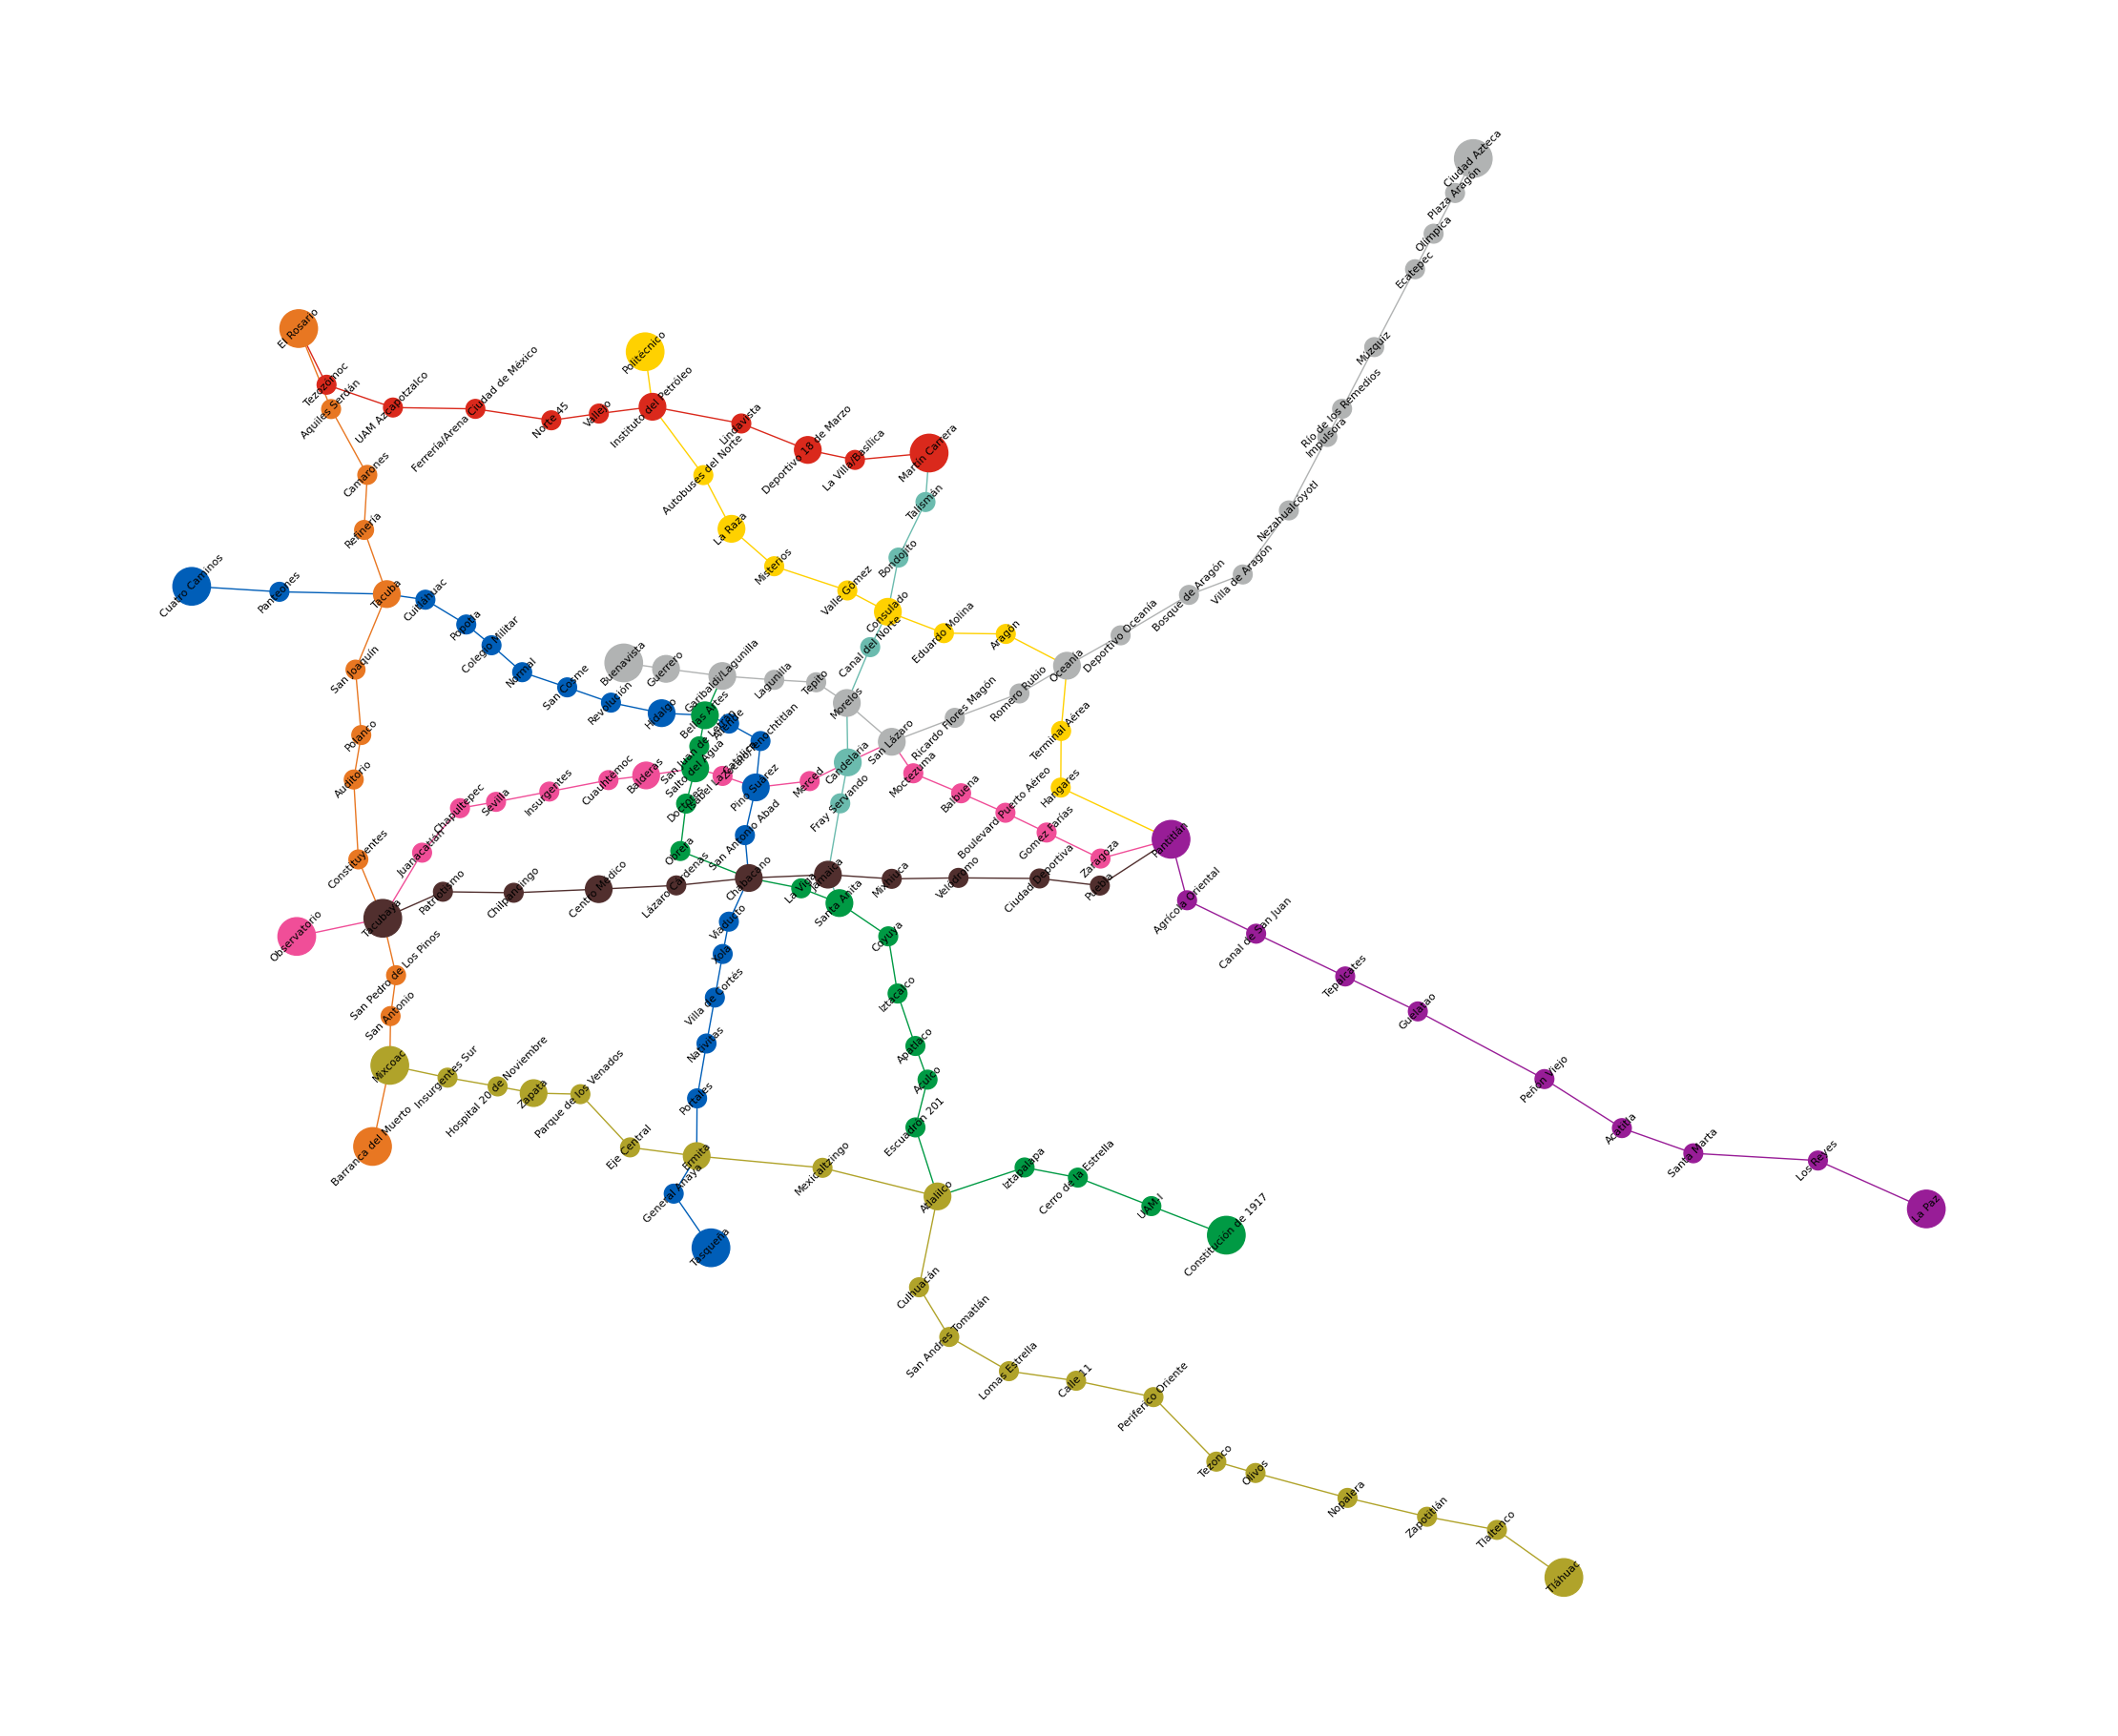

In [22]:
#Excluyendo la linea 3
G_sin_L3 = G.copy()

edges_L3 = [
    (u, v) for u, v, data in G_sin_L3.edges(data=True) if data['linea'] == '03'
]
G_sin_L3.remove_edges_from(edges_L3)

isolated_nodes = [node for node, degree in G_sin_L3.degree() if degree == 0]
G_sin_L3.remove_nodes_from(isolated_nodes)

for node, data in G_sin_L3.nodes(data=True):
    if 'transbordo' in data['tipo'].lower() and data['linea'] == '03':
        if G_sin_L3.degree(node) > 0:
            primer_enlace = list(G_sin_L3.edges(node, data=True))[0]
            nueva_linea = primer_enlace[2]['linea']
            G_sin_L3.nodes[node]['linea'] = nueva_linea

edge_colors = [colores_linea[G_sin_L3.edges[e]['linea']] for e in G_sin_L3.edges]
node_colors = [colores_linea[G_sin_L3.nodes[n]['linea']] for n in G_sin_L3.nodes]

#Modificamos el tamaño de los nodos dependiendo que tipo de estación son
node_sizes = []
for n in G_sin_L3.nodes:
    tipo = G_sin_L3.nodes[n]['tipo'].lower()
    if "transbordo" and "terminal" in tipo:
        node_sizes.append(800)
    elif "transbordo" in tipo:
        node_sizes.append(400)
    elif "terminal" in tipo:
        node_sizes.append(300)
    else:
        node_sizes.append(200)

#Obtenemos la posición de los nodos con el atributo pos de cada nodo
pos = nx.get_node_attributes(G, 'pos')

plt.figure(figsize=(22, 18))
nx.draw(
    G_sin_L3,
    pos,
    with_labels=False,
    node_size=node_sizes,
    node_color=node_colors,
    edge_color=edge_colors,
    font_size=8,
    font_color="Black"
)

labels = {n: n for n in G_sin_L3.nodes}
textos = nx.draw_networkx_labels(
    G_sin_L3,
    pos,
    labels,
    font_size=8,
    font_color="black"
)

#Modificamos el texto a 45° para evitar que se encime con otras estaciones
for t in textos.values():
    t.set_rotation(45)

plt.axis("off")
plt.show()

# Métricas

¿Cuales son las estaciones con mas conexiones? Ignorando la importancia de estas

In [ ]:
#Centralidad de Grado
grado = dict(G.degree())
print("Nodos con mayor centralidad de grado")
for node, g in sorted(grado.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{node}: {g}")

Nodos con mayor centralidad de grado
Chabacano: 6
Tacubaya: 5
Pantitlán: 4
San Lázaro: 4
Candelaria: 4
Pino Suárez: 4
Salto del Agua: 4
Balderas: 4
Tacuba: 4
Hidalgo: 4


Qué tan conectado está el STC METRO.

In [ ]:
#Densidad
densidad = nx.density(G)
print("Densidad de la red:", round(densidad, 3))

Densidad de la red: 0.014


¿Qué estaciones están conectadas a otras estaciones importantes?

In [ ]:
#Eigenvector
eigen = nx.eigenvector_centrality(G, max_iter=100000)
print("Nodos con mayor centralidad de eigenvector:")
for node, val in sorted(eigen.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{node}: {round(val, 3)}")

Nodos con mayor centralidad de eigenvector:
Chabacano: 0.411
Jamaica: 0.314
Candelaria: 0.286
Morelos: 0.249
San Lázaro: 0.244
La Viga: 0.205
Fray Servando: 0.202
Santa Anita: 0.201
San Antonio Abad: 0.2
Pino Suárez: 0.184


Caminos cortos $→$ Estaciones desde donde se puede llegar rápido a toda la red. Estaciones bien conectadas.

Qué tan cerca está un nodo de todos los demás

In [ ]:
#Centralidad de Cercanía
closeness = nx.closeness_centrality(G)
print("Nodos con mayor centralidad de cercanía:")
for node, val in sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"{node}: {round(val, 3)}")

Nodos con mayor centralidad de cercanía:
Jamaica: 0.128
Chabacano: 0.126
Fray Servando: 0.123
Candelaria: 0.122
Lázaro Cárdenas: 0.121


Numero de caminos mas cortos $→$ Estaciones clave para transbordos o que conectan partes de la red.

In [ ]:
#Centralidad de Intermediación
betweenness = nx.betweenness_centrality(G)
print("Nodos con mayor centralidad de intermediación:")
for node, val in sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"{node}: {round(val, 3)}")

Nodos con mayor centralidad de intermediación:
Jamaica: 0.332
Chabacano: 0.287
Candelaria: 0.229
Centro Médico: 0.217
Fray Servando: 0.197


In [ ]:
#Centralidad de PageRank
pagerank = nx.pagerank(G)
print("Nodos con mayor centralidad de PageRank:")
for node, val in sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"{node}: {round(val, 3)}")

Nodos con mayor centralidad de PageRank:
Chabacano: 0.013
Tacubaya: 0.013
Tacuba: 0.011
Ermita: 0.011
Instituto del Petróleo: 0.01


¿Cuantas estaciones debo recorrer para llegar de un extremo al otro? (Toma en cuenta número de estaciones y no kilómetros).

In [ ]:
#Diametro
diametro = nx.diameter(G)
print("El diámetro de la red es:", diametro)

El diámetro de la red es: 35


La menor distancia máxima a todas las demás estaciones $→$ Estaciones "cercanas" a todas las demás.

In [ ]:
#Radio
radio = nx.radius(G)
print("El radio de la red es:", radio)

El radio de la red es: 18


La distancia máxima de un nodo a cualquier otro nodo. $→$ Estaciones mas periféricas o aisladas.

In [ ]:
#Excentricidad
eccentricity = nx.eccentricity(G)
print("Nodos con mayor excentricidad:")
for node, val in sorted(eccentricity.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"{node}: {val}")

Nodos con mayor excentricidad:
Tláhuac: 35
Ciudad Azteca: 35
Tlaltenco: 34
Plaza Aragón: 34
Zapotitlán: 33


Nodos cuya centralidad es igual al radio de la red. $→$ Estaciones desde las cuales es fácil llegar a todas las demas.

No mide promedio como cercanía, sino el mínimo de la excentricidad. Estaciones que no están “lejos” de ninguna otra estación.

In [ ]:
#Centro
centro = nx.center(G)
print("Nodos centrales de la red:", centro)

Nodos centrales de la red: ['Santa Anita', 'Jamaica']


La asortatividad mide la similitud de las conexiones en la red con respecto al grado de los nodos. Su valor está entre -1 y 1.

Cercano a 1: Los nodos de alto grado se conectan entre sí.

Cercano a 0: No hay preferencia de conexión, se conectan tanto alto grado con alto grado como con bajo y bajo grado con bajo y alto grado.

Cercano a -1: Los nodos de alto grado se conectan la mayoria de las veces a nodos de grado bajo.

In [ ]:
# Asortatividad por grado
asortatividad = nx.degree_assortativity_coefficient(G)
print("Coeficiente de asortatividad de la red:", round(asortatividad, 3))

Coeficiente de asortatividad de la red: -0.15


$x_i = \alpha \sum_{j} A_{ij} x_j + \beta$

$A$ matriz de adyacencia con eigenvalores $\lambda$

$\beta$ controla la centralidad inicial (atributo de peso para vecinos inmediatos)

$\alpha < 1/\lambda$ (factor de atenuación, es para que las contribuciones de caminos más largos cuenten, pero cada vez menos)

Como eigenvector pero toma en cuenta la importancia de todos los nodos (con decaimiento en su importancia) en vez de solo la de los vecinos inmediatos.

In [ ]:
import numpy as np

#Matriz de adyacencia
A = nx.to_numpy_array(G)
#Eigenvalores
eigenvalues = np.linalg.eigvals(A)
#Tomar el eigenvalor máximo
lambda_max = max(abs(eigenvalues))
print("lambda_max:", round(lambda_max,3))

#Definir alpha
alpha = 1 / (lambda_max + 0.01)

print("Alpha recomendado:", round(alpha,3), "\n")
#Centralidad de Katz
katz = nx.katz_centrality_numpy(G, alpha=alpha, beta=1.0)
katz_sorted = sorted(katz.items(), key=lambda x: x[1], reverse=True)

print("Nodos con mayor centralidad de Katz:")
for node, val in katz_sorted[:5]:
    print(f"{node}: {round(val, 3)}")

lambda_max: 2.976
Alpha recomendado: 0.335 

Nodos con mayor centralidad de Katz:
Chabacano: 0.405
Jamaica: 0.309
Candelaria: 0.284
Morelos: 0.248
San Lázaro: 0.243
